### Bar plots global means with extra cases



In [ ]:
from sect_sens.constants import get_plotpath
from sect_sens.util.naming_conventions.var_info import get_fancy_var_name
from sect_sens.util.practical_functions import make_folders
from sect_sens.util.slice_average import one_val_tab
# noinspection PyBroadException
from sect_sens.util.slice_average.one_val_tab import get_mean_std_by_type
from useful_scit.imps import (plt, pd, sns)

from sect_sens.data_info import simulation_types
import matplotlib as mpl
import numpy as np
from IPython import get_ipython

try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

## Filenames

In [2]:
from sect_sens.util.plot.colors import get_case_col

version = 'clean_elvoc'
plt_path = get_plotpath('one_value')


def create_filename(name):
    fn = f'{plt_path}_bar_{version}_{name}.'
    make_folders(fn)
    return fn

In [3]:
startyear = '0004-01'
endyear = '0005-12'
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev

## Models and variables to include:

In [4]:
varl = ['N_AER', 'NCONC01', 'TGCLDCWP', 'CDNUMC', 'NCFT_Ghan', 'DIR_Ghan', 'LWDIR_Ghan', 'SWDIR_Ghan', 'SWCF_Ghan',
        'LWCF_Ghan', 'cb_SO4_NA', 'cb_SOA_NA', 'cb_NA', 'SOA_NA', 'SO4_NA',
        'ACTNL_incld', 'ACTREL_incld', 'SFisoprene', 'SFmonoterp']
varl_ex = ['FSNT', 'FSNT_DRF', 'FLNT', 'FLNT_DRF', 'FSNTCDRF']
varl = varl + varl_ex
cases_sec = [
    'NF1850_SECT_ctrl',  # _smax',
    'NF1850_aeroxid2014_SECT_ctrl',  # _smax',
    'NF1850_SECT_elvoc_smax',
    'NF1850_aeroxid2014_SECT_elvoc_smax',
    'NF1850_SECT_svoc_smax',
    'NF1850_aeroxid2014_SECT_svoc_smax',

]
cases_nsec = [
    'NF1850_noSECT_def',  # _smax',
    'NF1850_aeroxid2014_noSECT_def',  # _smax',
    'NF1850_aeroxid2014_noSECT_ox_ricc',
    'NF1850_noSECT_ox_ricc',

]

In [5]:


case_types = ['PI', 'PIaerPD']
# model_types = ['OsloAeroSec$_{gord}$','OsloAeroSec','OsloAero$_{gord}$', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']
model_types = ['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']
case_types = ['PI', 'PD']
model_types = ['OsloAeroSec', 'OsloAeroSec$_{elvoc}$', 'OsloAero$_{imp}$', 'OsloAero$_{def}$'][
              ::-1]  # 'OsloAeroSec$_{gord}$','OsloAero$_{gord}$''OsloAero$_{imp}$',
model_types2 = ['OsloAeroSec', 'OsloAeroSec$_{elvoc}$', 'OsloAeroSec$_{svoc}$', 'OsloAero$_{imp}$', 'OsloAero$_{def}$'][
               ::-1]  # 'OsloAeroSec$_{gord}$','OsloAero$_{gord}$''OsloAero$_{imp}$',

cdic = {key: get_case_col(key) for key in model_types2}  # , ['r','g','b'])}

## Import data

In [6]:
# varl = ['N_AER']
df2, dic_vals = one_val_tab.get_tab_yearly_mean(varl,
                                                cases_sec + cases_nsec,
                                                startyear,
                                                endyear,
                                                pmin=pmin,
                                                pressure_adjust=pressure_adjust,
                                                average_over_lev=avg_over_lev,
                                                groupby='time.year',  # 'time',
                                                dims=None,
                                                area='Global',
                                                invert_dic=True
                                                )

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc
averaging case NF1850_SECT_elvoc_smax:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_elvoc_smax:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_elvoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc
averaging case NF1850_SECT_svoc_smax:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc
averaging case NF1850_aeroxid2014_SECT_svoc_smax:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_svoc_smax/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['N_AER']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['TGCLDCWP']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['CDNUMC']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['NCFT_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['DIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['LWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['SWDIR_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['SWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['LWCF_Ghan']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['cb_SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['cb_SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['cb_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['SOA_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['SO4_NA']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['ACTNL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['ACTREL', 'FCTL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['SFisoprene']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['SFmonoterp']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['FSNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['FSNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/minicond

found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['FLNT']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['FLNT_DRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['FSNTCDRF']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: Runtime

In [7]:
print(model_types2)

['OsloAero$_{def}$', 'OsloAero$_{imp}$', 'OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$', 'OsloAeroSec']


## Get difference

In [8]:
relative = False
dic_diff = simulation_types.get_diff_by_type(dic_vals, varl, case_types=['PI', 'PD'],
                                             relative=relative,
                                             mod_types=model_types2,
                                             ctrl='PI'
                                             )['PD-PI']

ls = []
for key in dic_diff.keys():
    print(key)
    _df = dic_diff[key]

    _df['case'] = key
    print(_df.keys())
    ls.append(_df.reset_index())

df_tot = pd.concat(ls)

['PI', 'PD'] ['OsloAero$_{def}$', 'OsloAero$_{imp}$', 'OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$', 'OsloAeroSec']
subtracting NF1850_noSECT_def-NF1850_noSECT_def
subtracting NF1850_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_SECT_svoc_smax-NF1850_SECT_svoc_smax
subtracting NF1850_SECT_elvoc_smax-NF1850_SECT_elvoc_smax
subtracting NF1850_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_aeroxid2014_noSECT_def-NF1850_noSECT_def
subtracting NF1850_aeroxid2014_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_aeroxid2014_SECT_svoc_smax-NF1850_SECT_svoc_smax
subtracting NF1850_aeroxid2014_SECT_elvoc_smax-NF1850_SECT_elvoc_smax
subtracting NF1850_aeroxid2014_SECT_ctrl-NF1850_SECT_ctrl
OsloAero$_{def}$
Index(['N_AER', 'NCONC01', 'TGCLDCWP', 'CDNUMC', 'NCFT_Ghan', 'DIR_Ghan',
       'LWDIR_Ghan', 'SWDIR_Ghan', 'SWCF_Ghan', 'LWCF_Ghan', 'cb_SO4_NA',
       'cb_SOA_NA', 'cb_NA', 'SOA_NA', 'SO4_NA', 'ACTNL_incld', 'ACTREL_incld',
       'SFisoprene', 'SFmonoterp', 'FSNT', 'FSNT_

In [9]:
trans_dic = {v: get_fancy_var_name(v) for v in varl}

rn_dic = {
    'NCRE$_{Ghan}$': 'ERF$_{aci}$',
    'SWCRE$_{Ghan}$': 'ERF$_{aci,SW}$',
    'LWCRE$_{Ghan}$': 'ERF$_{aci,LW}$',
    'DRE$_{Ghan}$': 'ERF$_{ari}$'

}

svarl = ['NCFT_Ghan', 'SWCF_Ghan', 'LWCF_Ghan', 'DIR_Ghan']

df1 = df_tot[[*svarl, 'case']]
df1 = df1.rename(trans_dic, axis=1)
df1 = df1.rename(rn_dic, axis=1)
df2 = pd.melt(df1, id_vars='case')

In [10]:
cols = [cdic[c] for c in df_tot['case'].unique()]

In [11]:
df2.groupby(['case', 'variable']).mean()

value
case                  variable                
OsloAero$_{def}$      ERF$_{aci,LW}$  0.148602
                      ERF$_{aci,SW}$ -1.399590
                      ERF$_{aci}$    -1.250988
                      ERF$_{ari}$     0.038252
OsloAero$_{imp}$      ERF$_{aci,LW}$  0.166034
                      ERF$_{aci,SW}$ -1.458293
                      ERF$_{aci}$    -1.292259
                      ERF$_{ari}$     0.047983
OsloAeroSec           ERF$_{aci,LW}$  0.043660
                      ERF$_{aci,SW}$ -1.213662
                      ERF$_{aci}$    -1.170002
                      ERF$_{ari}$     0.026648
OsloAeroSec$_{elvoc}$ ERF$_{aci,LW}$  0.038259
                      ERF$_{aci,SW}$ -1.205717
                      ERF$_{aci}$    -1.167458
                      ERF$_{ari}$     0.030070
OsloAeroSec$_{svoc}$  ERF$_{aci,LW}$  0.040749
                      ERF$_{aci,SW}$ -1.249887
                      ERF$_{aci}$    -1.209138
                      ERF$_{ari}$     0.018541

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/one_value/_bar_clean_elvoc_forcing.


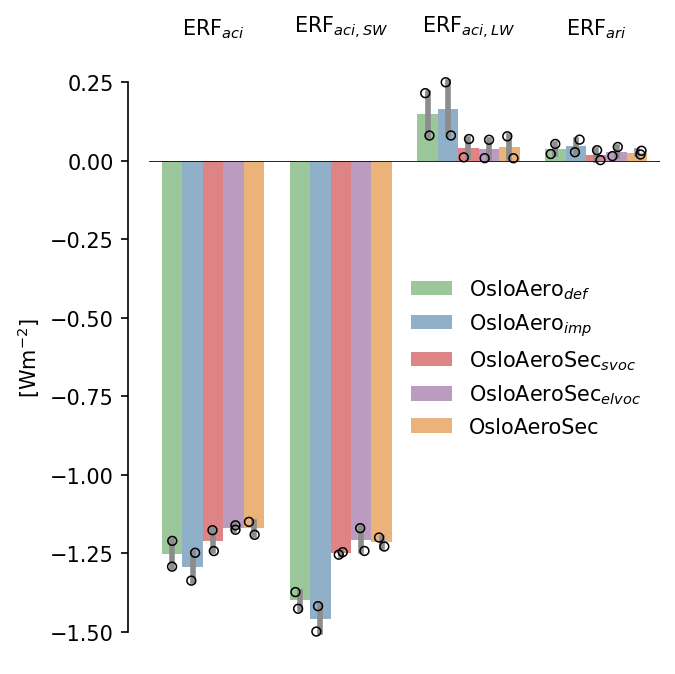

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/one_value/_bar_clean_elvoc_forcing.


In [12]:

figsize = [5, 3]
figsize = [4.6, 4.6]
f, ax = plt.subplots(figsize=figsize, dpi=150)

pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)
sns.barplot(y='value', x='variable', hue='case', data=df2, errcolor='.55', ci=90, palette=cols, alpha=.6)
g = sns.stripplot(y='value', x='variable', hue='case', data=df2, dodge=True, marker=open_circle, palette=['none'] * 3,
                  jitter=.2, label='_nolegend_')  # , add_=False)#label='_nolabel_')

handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[5:], labels[5:], frameon=False, loc='center right')

ax.axhline(0, linewidth=0.4, c='k')
sns.despine(f, bottom=True, trim=True, offset=10)
# ax.legend(frameon=False)
plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labeltop=True,
    labelbottom=False
)  # labels along the bottom edge are off
ax.set_ylabel('[Wm$^{-2}$]')
ax.set_xlabel('')

fn = create_filename('forcing')
plt.tight_layout()
f.savefig(fn + 'pdf', dpi=300)
print(fn)
plt.show()

print(fn)

['PI', 'PD'] ['OsloAero$_{def}$', 'OsloAero$_{imp}$', 'OsloAeroSec$_{elvoc}$', 'OsloAeroSec']
subtracting NF1850_noSECT_def-NF1850_noSECT_def
subtracting NF1850_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_SECT_elvoc_smax-NF1850_SECT_elvoc_smax
subtracting NF1850_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_aeroxid2014_noSECT_def-NF1850_noSECT_def
subtracting NF1850_aeroxid2014_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_aeroxid2014_SECT_elvoc_smax-NF1850_SECT_elvoc_smax
subtracting NF1850_aeroxid2014_SECT_ctrl-NF1850_SECT_ctrl


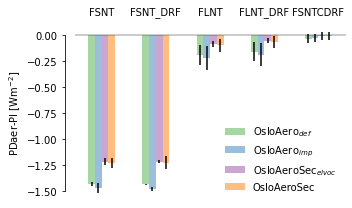

In [13]:
figsize = [5, 3]
svarl = ['FSNT', 'FSNT_DRF', 'FLNT', 'FLNT_DRF', 'FSNTCDRF']  # '', 'SWCF_Ghan', 'LWCF_Ghan','DIR_Ghan']

mean, std, mean_nn, std_nn = get_mean_std_by_type(dic_vals, svarl,
                                                  case_types=case_types, model_types=model_types, ctrl=case_types[0])

fig, ax = plt.subplots(1, figsize=figsize)
mean_nn.plot.bar(alpha=0.5, ax=ax, color=[cdic[c] for c in pd.DataFrame(mean).columns],
                 yerr=std_nn)  # , colors={'OsloAeroSec':'b'})
ax.axhline(0, linewidth=0.4, c='k')
sns.despine(fig, bottom=True, trim=True, offset=10)
ax.legend(frameon=False)
plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labeltop=True,
    labelbottom=False
)  # labels along the bottom edge are off
ax.set_ylabel('PDaer-PI [Wm$^{-2}$]')
fn = create_filename('forcing')
plt.tight_layout()
# fig.savefig(fn+'pdf', dpi=300)
plt.show()

### diff NCRE:

['PI', 'PD'] ['OsloAero$_{def}$', 'OsloAero$_{imp}$', 'OsloAeroSec$_{elvoc}$', 'OsloAeroSec']


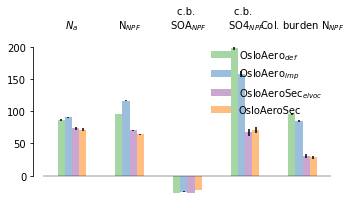

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/one_value/_bar_clean_elvoc_aerosol.


In [14]:
figsize = [5, 3]
svarl = ['N_AER', 'NCONC01', 'cb_SOA_NA', 'cb_SO4_NA', 'cb_NA']
rn_dic = {
    'c.b. SOA$_{NPF}$+SO4$_{NPF}$': 'c.b. SOA$_{NPF}$ \n+ SO4$_{NPF}$',
    'c.b. SOA$_{NPF}$': 'c.b. \n SOA$_{NPF}$',
    'c.b. SO4$_{NPF}$': 'c.b. \n SO4$_{NPF}$',
}
mean, std, mean_nn, std_nn = get_mean_std_by_type(dic_vals, svarl, relative=True, model_types=model_types,
                                                  case_types=case_types)
mean_nn = mean_nn.rename(rn_dic)
std_nn = std_nn.rename(rn_dic)
fig, ax = plt.subplots(1, figsize=figsize)
mean_nn.plot.bar(alpha=0.5, ax=ax, color=[cdic[c] for c in pd.DataFrame(mean).columns],
                 yerr=std_nn)  # , colors={'OsloAeroSec':'b'})
ax.axhline(0, linewidth=0.4, c='k')
sns.despine(fig, bottom=True, trim=True, offset=10)
ax.legend(frameon=False)
plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labeltop=True,
    labelbottom=False
)  # labels along the bottom edge are off

# ax.set_ylabel('(PDaer-PI)/PI [%]')
fn = create_filename('aerosol')
plt.tight_layout()
fig.savefig(fn + 'pdf', dpi=300)
plt.show()
print(fn)

['PI', 'PD'] ['OsloAero$_{def}$', 'OsloAero$_{imp}$', 'OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$', 'OsloAeroSec']


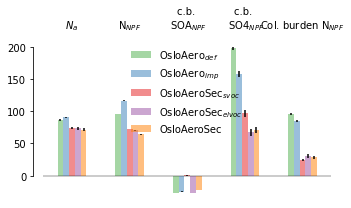

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/one_value/_bar_clean_elvoc_aerosol.


In [15]:
figsize = [5, 3]
svarl = ['N_AER', 'NCONC01', 'cb_SOA_NA', 'cb_SO4_NA', 'cb_NA']
rn_dic = {
    'c.b. SOA$_{NPF}$+SO4$_{NPF}$': 'c.b. SOA$_{NPF}$ \n+ SO4$_{NPF}$',
    'c.b. SOA$_{NPF}$': 'c.b. \n SOA$_{NPF}$',
    'c.b. SO4$_{NPF}$': 'c.b. \n SO4$_{NPF}$',
}
mean, std, mean_nn, std_nn = get_mean_std_by_type(dic_vals, svarl, relative=True, model_types=model_types2,
                                                  case_types=case_types)
mean_nn = mean_nn.rename(rn_dic)
std_nn = std_nn.rename(rn_dic)
fig, ax = plt.subplots(1, figsize=figsize)
mean_nn.plot.bar(alpha=0.5, ax=ax, color=[cdic[c] for c in pd.DataFrame(mean).columns],
                 yerr=std_nn)  # , colors={'OsloAeroSec':'b'})
ax.axhline(0, linewidth=0.4, c='k')
sns.despine(fig, bottom=True, trim=True, offset=10)
ax.legend(frameon=False)
plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labeltop=True,
    labelbottom=False
)  # labels along the bottom edge are off

# ax.set_ylabel('(PDaer-PI)/PI [%]')
fn = create_filename('aerosol')
plt.tight_layout()
# fig.savefig(fn+'pdf', dpi=300)
plt.show()
print(fn)

['PI', 'PD'] ['OsloAero$_{def}$', 'OsloAero$_{imp}$', 'OsloAeroSec$_{elvoc}$', 'OsloAeroSec']


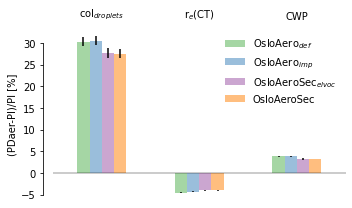

In [16]:

svarl = ['CDNUMC', 'ACTREL_incld', 'TGCLDCWP']  # 'cb_SOA_NA', 'cb_SO4_NA']
relative = True
mean, std, mean_nn, std_nn = get_mean_std_by_type(dic_vals, svarl, case_types=case_types, model_types=model_types,
                                                  relative=relative)

fig, ax = plt.subplots(1, figsize=figsize)
mean_nn.plot.bar(alpha=0.5, ax=ax, color=[cdic[c] for c in pd.DataFrame(mean).columns],
                 yerr=std_nn)  # , colors={'OsloAeroSec':'b'})
ax.axhline(0, linewidth=0.4, c='k')
sns.despine(fig, bottom=True, trim=True, offset=10)
ax.legend(frameon=False)
plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labeltop=True,
    labelbottom=False
)  # labels along the bottom edge are off

ax.set_ylabel('(PDaer-PI)/PI [%]')
fn = create_filename('cld_props')
plt.tight_layout()
# fig.savefig(fn+'pdf', dpi=300)
plt.show()

['PI', 'PD'] ['OsloAero$_{def}$', 'OsloAero$_{imp}$', 'OsloAeroSec$_{elvoc}$', 'OsloAeroSec']


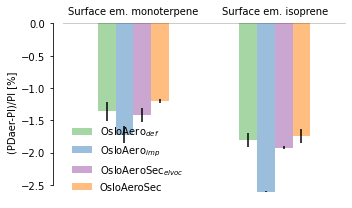

In [17]:

svarl = ['SFmonoterp', 'SFisoprene']  # 'cb_SOA_NA', 'cb_SO4_NA']
relative = True
mean, std, mean_nn, std_nn = get_mean_std_by_type(dic_vals, svarl, case_types=case_types,
                                                  model_types=model_types,
                                                  relative=relative)

fig, ax = plt.subplots(1, figsize=figsize)
mean_nn.plot.bar(alpha=0.5, ax=ax, color=[cdic[c] for c in pd.DataFrame(mean).columns],
                 yerr=std_nn)  # , colors={'OsloAeroSec':'b'})
ax.axhline(0, linewidth=0.4, c='k')
sns.despine(fig, bottom=True, trim=True, offset=10)
ax.legend(frameon=False)
plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labeltop=True,
    labelbottom=False
)  # labels along the bottom edge are off

ax.set_ylabel('(PDaer-PI)/PI [%]')
fn = create_filename('bvoc')
plt.tight_layout()
# fig.savefig(fn+'pdf', dpi=300)
plt.show()